# day06: Gradient Descent for Linear Regression

# Objectives

* Learn how to fit weight parameters of Linear Regression to a simple dataset via gradient descent
* Understand impact of step size
* Understand impact of initialization


# Outline
* [Part 1: Loss and Gradient for 1-dim. Linear Regression](#part1)
* [Part 2: Gradient Descent Algorithm in a few lines of Python](#part2)
* [Part 3: Debugging with Trace Plots](#part3)
* [Part 4: Selecting the step size](#part4)
* [Part 5: Selecting the initialization](#part5)
* [Part 6: Using SciPy's built-in routines](#part6)

# Takeaways


* Gradient descent is a simple algorithm that can be implemented in a few lines of Python

* Step size matters a lot

* Initialization of the parameters can matter too!

* scipy offers some useful tools for gradient descent
* * "L-BFGS-B" method is highly recommended if you have your loss and gradient functions available
* * Cannot do stochastic minibatches (requires a modest size dataset, not too big)

In [5]:
import numpy as np

In [6]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

# Create simple dataset:   y = 1.234 * x + noise

In [7]:
def create_dataset(N=100, slope=1.234, noise_stddev=0.1, random_state=0):
    random_state = np.random.RandomState(int(random_state))

    # input features
    x_N = np.linspace(-2, 2, N)
    
    # output features
    y_N = slope * x_N + random_state.randn(N) * noise_stddev
    
    return x_N, y_N

In [8]:
x_N, y_N = create_dataset(N=50, noise_stddev=0.3)

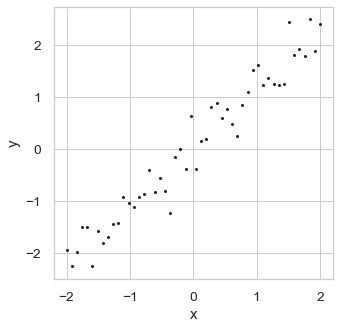

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x_N, y_N, 'k.');
plt.xlabel('x');
plt.ylabel('y');

# Part 1: Gradient Descent for 1-dim. Linear Regression

## Define model

Consider the *simplest* linear regression model. A single weight parameter $w \in \mathbb{R}$ representing the slope of the prediction line. No bias/intercept.

To make predictions, we just compute the weight multiplied by the input feature
$$
\hat{y}(x) = w \cdot x
$$

## Define loss function

We want to minimize the total *squared error* across all N observed data examples (input features $x_n$, output responses $y_n$)

\begin{align}
    \min_{w \in \mathbb{R}} ~~ &\ell(w)
    \\
    \ell(w) &= \sum_{n=1}^N (y_n - w x_n)^2
\end{align}

In [11]:
def calc_loss(w):
    yhat_N = x_N * w
    sum_squared_error = np.sum(np.square(y_N - yhat_N))
    return sum_squared_error

# Define the gradient function

\begin{align}
\text{calc_grad}(w) = \ell'(w) &= \frac{\partial}{\partial w} [ \sum_{n=1}^N (y_n - w x_n)^2] 
\\
&= \sum_{n=1}^N 2 (y_n - w x_n) (-x_n)
\\
&= 2 \sum_{n=1}^N w x_n^2 - y_n x_n
\end{align}

In [15]:
def calc_grad(w):
    g = w * np.sum(np.square(x_N)) - np.sum(x_N * y_N)
    return g

## Plot loss evaluated at each w from -3 to 8

In [32]:
w_grid = np.linspace(-3, 8, 300)

Text(0, 0.5, 'loss(w)')

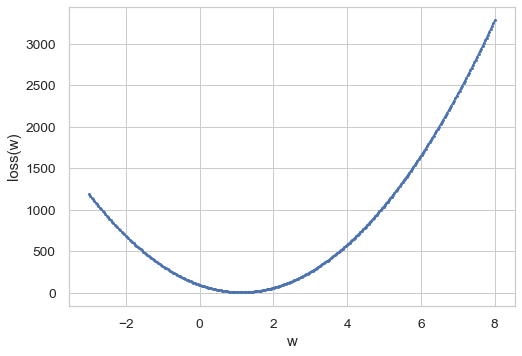

In [34]:
loss_grid = np.asarray([calc_loss(w) for w in w_grid])
plt.plot(w_grid, loss_grid, 'b.-');
plt.xlabel('w');
plt.ylabel('loss(w)')

### Discussion 1a: Visually, at what value of $w$ does the loss function have a minima? Is it near where you would expect (hint: look above for the "true" slope value used to generate the data)

### Exercise 1b: Write NumPy code to identify which entry in the w_grid array corresponds to the lowest entry in the loss_grid array

Hint: use np.argmin

In [31]:
# TODO write code here

## Sanity check: plot gradient evaluated at each w from -3 to 8

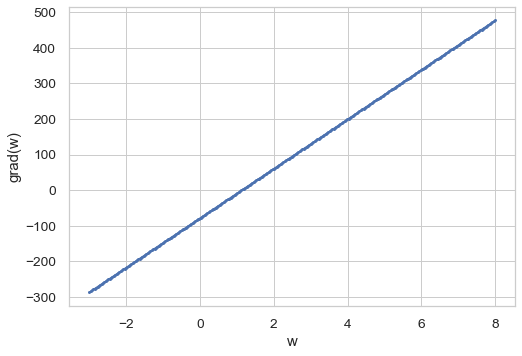

In [35]:
grad_grid = np.asarray([calc_grad(w) for w in w_grid])
plt.plot(w_grid, grad_grid, 'b.-');
plt.xlabel('w');
plt.ylabel('grad(w)');

### Discussion 1c: Visually, at what value of $w$ does the gradient function cross zero? Is it the same place as the location of the minimum in the loss above?

TODO

### Exercise 1d: Numerically, at which value of w does grad_grid cross zero?

In [36]:
# TODO compute with w_grid and grad_grid

## Part 2: Gradient Descent (GD) as an algorithm in Python


### Define minimize_via_grad_descent algorithm

Can you understand what each step of this algorithm does?

In [59]:
def minimize_via_grad_descent(calc_loss, calc_grad, init_w=0.0, step_size=0.001, max_iters=100):
    ''' Perform minimization of provided loss function via gradient descent
    
    Args
    ----
    calc_loss : function
    calc_grad : function
    init_w : float
    step_size : float
    max_iters : positive int
    
    Return
    ----
    wopt: array of optimized weights that approximately gives the least error
    dict with the history of loss, weight and gradient
    '''
    w = np.asarray(init_w).copy()
    grad = calc_grad(w)

    # Create some lists to track progress over time (for debugging)
    trace_loss_list = []
    trace_w_list = []
    trace_grad_list = []

    for iter_id in range(max_iters):
        if iter_id > 0:
            w = w - step_size * grad
        
        loss = calc_loss(w)
        grad = calc_grad(w)    

        print("  iter %5d/%d | loss % 13.4f | w  % 13.5f" % (iter_id, max_iters, loss, w))
    
        trace_loss_list.append(loss)
        trace_w_list.append(w)
        trace_grad_list.append(grad)
        
    wopt = w
    return wopt, dict(trace_loss_list=trace_loss_list, trace_w_list=trace_w_list, trace_grad_list=trace_grad_list)

### Discussion 2a: Which line of the above function does the *parameter update* happen?

Remember, in math, the parameter update of gradient descent is this:
$$
w \gets w - \epsilon \nabla_w \ell(w)
$$

In other words, move the parameter $w$ from its current value a *small step* in the "downhill" direction (indicated by gradient).

TODO 

### Try it! Run GD with step_size = 0.001

In [55]:
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.001);

  iter     0/100 | loss       93.3197 | w        0.00000
  iter     1/100 | loss       81.4899 | w        0.07828
  iter     2/100 | loss       71.2448 | w        0.15113
  iter     3/100 | loss       62.3722 | w        0.21892
  iter     4/100 | loss       54.6881 | w        0.28201
  iter     5/100 | loss       48.0334 | w        0.34072
  iter     6/100 | loss       42.2702 | w        0.39535
  iter     7/100 | loss       37.2791 | w        0.44620
  iter     8/100 | loss       32.9565 | w        0.49352
  iter     9/100 | loss       29.2130 | w        0.53755
  iter    10/100 | loss       25.9710 | w        0.57853
  iter    11/100 | loss       23.1633 | w        0.61666
  iter    12/100 | loss       20.7317 | w        0.65215
  iter    13/100 | loss       18.6258 | w        0.68518
  iter    14/100 | loss       16.8021 | w        0.71592
  iter    15/100 | loss       15.2226 | w        0.74452
  iter    16/100 | loss       13.8548 | w        0.77114
  iter    17/100 | loss       1

### Discussion 2b: Does it appear from the *loss* values in trace above that the GD procedure converged?

### Discussion 2c: Does it appear from the *parameter* values in trace above that the GD procedure converged?

## Part 3: Diagnostic plots for gradient descent

Let's look at some trace functions.

Whenever you run gradient descent, an *excellent* debugging strategy is the ability to plot the loss, the gradient magnitude, and the parameter of interest at every step of the algorithm.

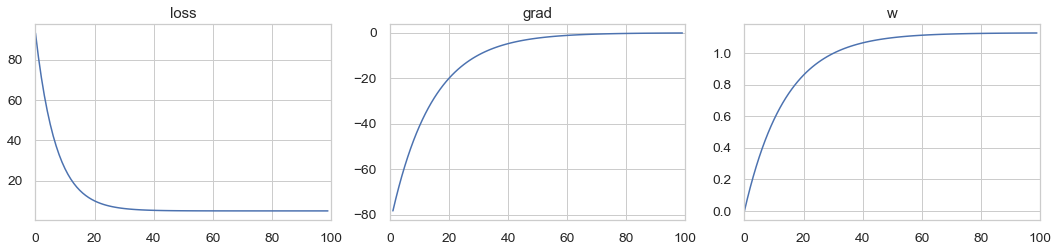

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(18,3.6))

axes[0].plot(info_dict['trace_loss_list']);
axes[0].set_title('loss');
axes[1].plot(info_dict['trace_grad_list']);
axes[1].set_title('grad');
axes[2].plot(info_dict['trace_w_list']);
axes[2].set_title('w');

plt.xlim([0, 100]);

### Discussion 3a: What value do we expect the *loss* to converge to? Should it always be zero?

### Discussion 3b: What value do we expect the *gradient* to converge to? Should it always be zero?

# Part 4: Larger step sizes

## Try with larger step_size = 0.02

In [60]:
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.02);

  iter     0/100 | loss       93.3197 | w        0.00000
  iter     1/100 | loss       18.2892 | w        1.56557
  iter     2/100 | loss        7.0081 | w        0.95851
  iter     3/100 | loss        5.3119 | w        1.19390
  iter     4/100 | loss        5.0569 | w        1.10263
  iter     5/100 | loss        5.0185 | w        1.13802
  iter     6/100 | loss        5.0128 | w        1.12429
  iter     7/100 | loss        5.0119 | w        1.12962
  iter     8/100 | loss        5.0118 | w        1.12755
  iter     9/100 | loss        5.0118 | w        1.12835
  iter    10/100 | loss        5.0118 | w        1.12804
  iter    11/100 | loss        5.0118 | w        1.12816
  iter    12/100 | loss        5.0118 | w        1.12812
  iter    13/100 | loss        5.0118 | w        1.12813
  iter    14/100 | loss        5.0118 | w        1.12813
  iter    15/100 | loss        5.0118 | w        1.12813
  iter    16/100 | loss        5.0118 | w        1.12813
  iter    17/100 | loss        

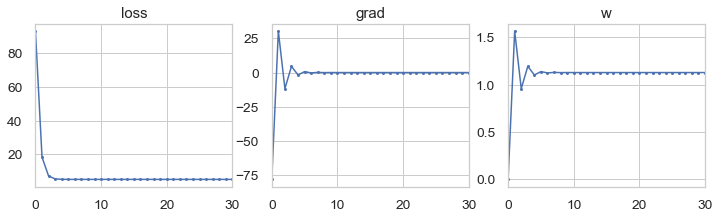

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(12,3))

axes[0].plot(info_dict['trace_loss_list'], '.-');
axes[0].set_title('loss');
axes[1].plot(info_dict['trace_grad_list'], '.-');
axes[1].set_title('grad');
axes[2].plot(info_dict['trace_w_list'], '.-');
axes[2].set_title('w');

plt.xlim([0, 30]);

## Try with even larger step size 0.1

In [51]:
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.1, max_iters=10);

  iter     0/10 | loss       93.3197 | w        0.00000
  iter     1/10 | loss     3119.5499 | w        7.82783
  iter     2/10 | loss   109851.8272 | w      -38.65989
  iter     3/10 | loss  3874198.3388 | w      237.42024
  iter     4/10 | loss  136639140.8422 | w    -1402.15769
  iter     5/10 | loss  4819133141.7277 | w     8334.92755
  iter     6/10 | loss  169966269538.6396 | w   -49491.43580
  iter     7/10 | loss  5994549633648.1299 | w   293926.35474
  iter     8/10 | loss  211422098095187.4062 | w  -1745554.80949
  iter     9/10 | loss  7456657513035461.0000 | w   10366465.98218


### Discussion 3b: What happens here with step size 0.1?

### Exercise 3c: What is the largest step size you can get to converge reasonably?

In [62]:
# TODO try some other step sizes here
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0) # TODO fix step_size

  iter     0/100 | loss       93.3197 | w        0.00000
  iter     1/100 | loss       93.3197 | w        0.00000
  iter     2/100 | loss       93.3197 | w        0.00000
  iter     3/100 | loss       93.3197 | w        0.00000
  iter     4/100 | loss       93.3197 | w        0.00000
  iter     5/100 | loss       93.3197 | w        0.00000
  iter     6/100 | loss       93.3197 | w        0.00000
  iter     7/100 | loss       93.3197 | w        0.00000
  iter     8/100 | loss       93.3197 | w        0.00000
  iter     9/100 | loss       93.3197 | w        0.00000
  iter    10/100 | loss       93.3197 | w        0.00000
  iter    11/100 | loss       93.3197 | w        0.00000
  iter    12/100 | loss       93.3197 | w        0.00000
  iter    13/100 | loss       93.3197 | w        0.00000
  iter    14/100 | loss       93.3197 | w        0.00000
  iter    15/100 | loss       93.3197 | w        0.00000
  iter    16/100 | loss       93.3197 | w        0.00000
  iter    17/100 | loss       9

# Part 5: Sensitivity to initial conditions



### Exercise 5a: Try to call the defined procedure with a different initial condition for $w$. What happens?

You could try $w = 5.0$ or something else.

### Exercise 5b: Try again with another value. Make a trace plot showing convergence from multiple different starting values for $w$. What do you notice?

# Part 6: Using scipy's built-in gradient optimization tools


In [63]:
import scipy.optimize

Take a look at SciPy's built in minimization toolbox

<https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize>

We'll use "L-BFGS", a second-order method that uses the function and its gradient.

In [71]:
result = scipy.optimize.minimize(calc_loss, 0.0, jac=calc_grad, method='L-BFGS-B')

print(result)

      fun: 5.01175994382598
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.42108547e-14])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.12812831])


In [72]:
best_w = result.x
print(best_w)

[1.12812831]
